In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt

In [5]:
data=pd.read_csv("Mall_Customers.csv")

In [6]:
data

,CustomerID,Genre,Age,Annual Income (k$),Spending Score (1-100)
0,1,Male,19,15,39
1,2,Male,21,15,81
2,3,Female,20,16,6
3,4,Female,23,16,77
4,5,Female,31,17,40
...,...,...,...,...,...
195,196,Female,35,120,79
196,197,Female,45,126,28
197,198,Male,32,126,74
198,199,Male,32,137,18


In [7]:
data.describe()

,CustomerID,Age,Annual Income (k$),Spending Score (1-100)
count,200.000000,200.000000,200.000000,200.000000
mean,100.500000,38.850000,60.560000,50.200000
std,57.879185,13.969007,26.264721,25.823522
min,1.000000,18.000000,15.000000,1.000000
25%,50.750000,28.750000,41.500000,34.750000
50%,100.500000,36.000000,61.500000,50.000000
75%,150.250000,49.000000,78.000000,73.000000
max,200.000000,70.000000,137.000000,99.000000


In [11]:
x=data.iloc[:,[3,4]].values

In [13]:
#find the number of clusters for the given data set

In [17]:
from sklearn.cluster import KMeans


In [27]:
wcss=[]
for i in range(1,11):
    km=KMeans(n_clusters=i,init="k-means++",n_init=10,max_iter=300)
    km.fit(x)
    wcss.append(km.inertia_)  

Text(0, 0.5, 'Wcss values')

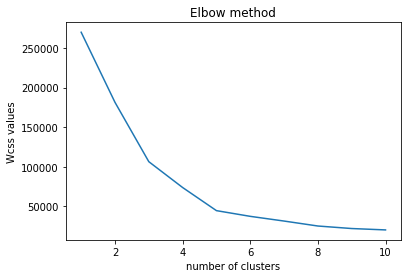

In [28]:
plt.plot(np.arange(1,11,1),wcss)
plt.title("Elbow method")
plt.xlabel("number of clusters")
plt.ylabel("Wcss values")

In [29]:
# the elbow method give the number of clusters for given data set
#we can use 5 clusters 

In [34]:
km=KMeans(n_clusters=5,init="k-means++",max_iter=300,n_init=10)
y_kmeans=km.fit_predict(x)


In [40]:
y_kmeans

array([4, 1, 4, 1, 4, 1, 4, 1, 4, 1, 4, 1, 4, 1, 4, 1, 4, 1, 4, 1, 4, 1,
       4, 1, 4, 1, 4, 1, 4, 1, 4, 1, 4, 1, 4, 1, 4, 1, 4, 1, 4, 1, 4, 3,
       4, 1, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3,
       3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3,
       3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3,
       3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 2, 0, 2, 3, 2, 0, 2, 0, 2,
       3, 2, 0, 2, 0, 2, 0, 2, 0, 2, 3, 2, 0, 2, 0, 2, 0, 2, 0, 2, 0, 2,
       0, 2, 0, 2, 0, 2, 0, 2, 0, 2, 0, 2, 0, 2, 0, 2, 0, 2, 0, 2, 0, 2,
       0, 2, 0, 2, 0, 2, 0, 2, 0, 2, 0, 2, 0, 2, 0, 2, 0, 2, 0, 2, 0, 2,
       0, 2], dtype=int32)

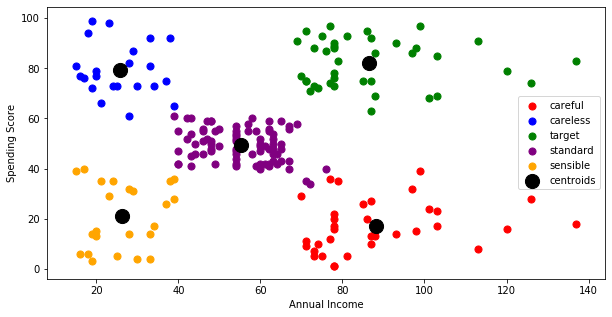

In [73]:
plt.rcParams["figure.figsize"]=(10,5)
plt.scatter(x[y_kmeans==0,0],x[y_kmeans==0,1],s=50,color="red",label="careful")
plt.scatter(x[y_kmeans==1,0],x[y_kmeans==1,1],s=50,color="blue",label="careless")
plt.scatter(x[y_kmeans==2,0],x[y_kmeans==2,1],s=50,color="green",label="target")
plt.scatter(x[y_kmeans==3,0],x[y_kmeans==3,1],s=50,color="purple",label="standard")
plt.scatter(x[y_kmeans==4,0],x[y_kmeans==4,1],s=50,color="orange",label="sensible")
plt.scatter(km.cluster_centers_[:,0],km.cluster_centers_[:,1],s=200,color="black",label="centroids")
plt.legend()
plt.xlabel("Annual Income")
plt.ylabel("Spending Score")
plt.show()